In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from scipy import stats
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
path = %pwd
correct_path = path.replace('\\','/')

diamonds = pd.read_csv(correct_path+'/data/diamonds.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### There are some 0 values in the x, y, z columns that we need to delete

In [5]:
# rewriting the 0's as null values so we can drop the rows
diamonds[['x','y','z']] = diamonds[['x','y','z']].replace(0, np.NaN)
diamonds.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [6]:
diamonds.dropna(inplace=True)
diamonds.describe()
# now the diamonds table is 20 rows shorter and without those zero or null values

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


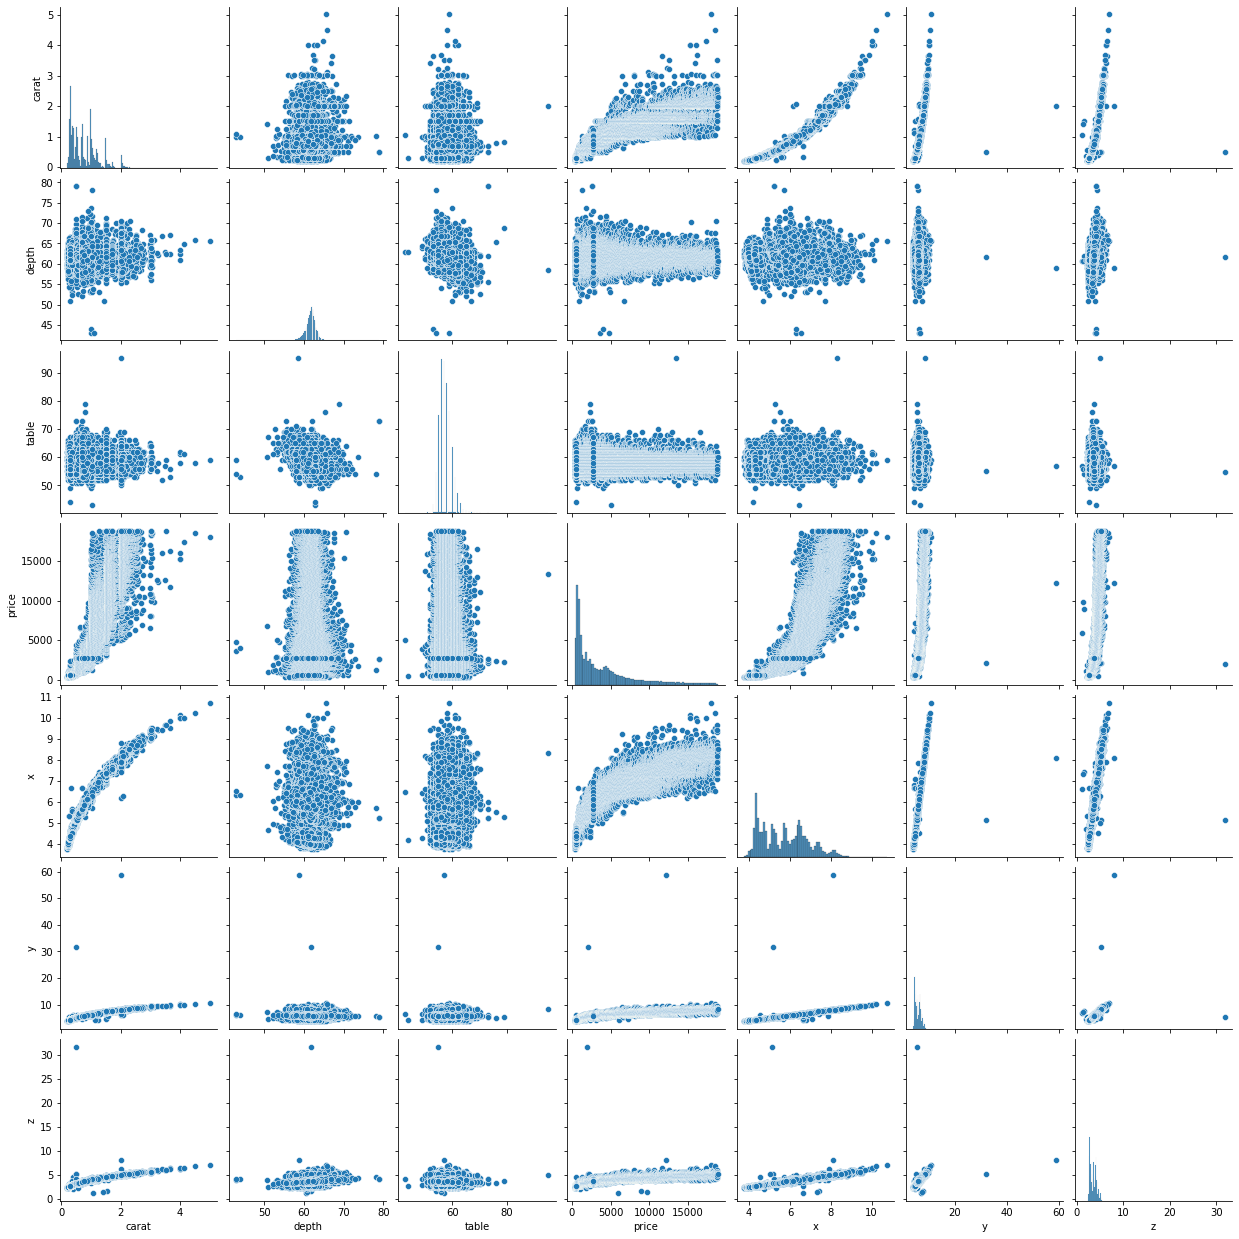

In [7]:
sb.pairplot(diamonds)

### A number of outliers are in this data, let's get rid of them
Going to use a z-score method, which will remove data points that are outside 3 standard deviations of the mean of the data

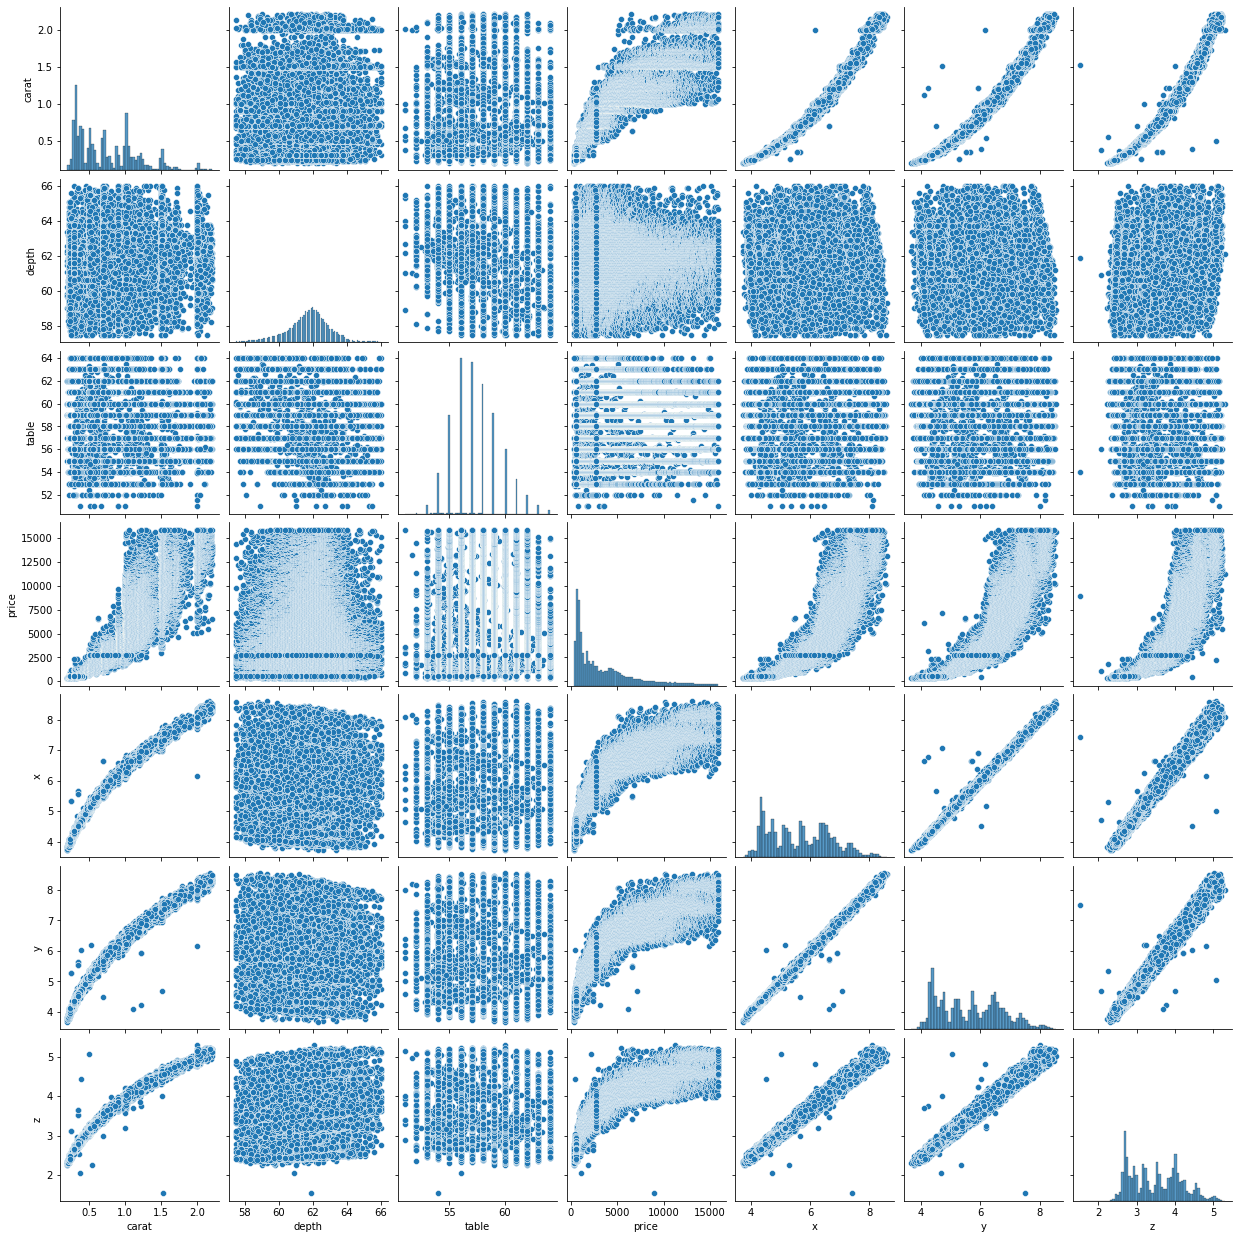

In [8]:
# calculates z-values for the columns in diamonds dataframe that do not have the dtype object
z = np.abs(stats.zscore(diamonds.select_dtypes(exclude='object')))
diamonds = diamonds[(z < 3).all(axis=1)]
sb.pairplot(diamonds)

In [9]:
diamonds.shape

(51586, 10)

## Much better! Now we've removed outliers and all zero-value data

## Now transform the categorical data so we can still use it for fitting

In [10]:
num_data = diamonds.select_dtypes(exclude='object')
cat_data = diamonds.select_dtypes(exclude=np.number)

encoder = LabelEncoder()
for col in cat_data.columns.to_list():
    cat_data[col] = encoder.fit_transform(cat_data[col])

cat_data

<ipython-input-10-7efda5d6e937>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[col] = encoder.fit_transform(cat_data[col])


,cut,color,clarity
0,2,1,3
1,3,1,2
3,3,5,5
4,1,6,3
5,4,6,7
...,...,...,...
53935,2,0,2
53936,1,0,2
53937,4,0,2
53938,3,4,3


In [11]:
diamond_data = pd.concat([num_data,cat_data], axis=1)
diamond_data

,carat,depth,table,price,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3,1,2
3,0.29,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,6,3
5,0.24,62.8,57.0,336,3.94,3.96,2.48,4,6,7
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,2,0,2
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,2
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,4,0,2
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,3,4,3


# Let's see if we can predict price based on all the other columns

In [12]:
from sklearn.linear_model import LinearRegression

In [22]:
price = diamond_data.price
data_for_price = diamond_data.drop(['price'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(data_for_price, price, test_size=0.3, random_state=100)

In [14]:
lin = LinearRegression()
lin.fit(x_train,y_train)
lin_perc = '{:.2%}'.format(lin.score(x_test, y_test))
print('Using linear regression, we are able to predict the price of a diamond with %s accuracy.' %(lin_perc))

Using linear regression, we are able to predict the price of a diamond with 89.24% accuracy.


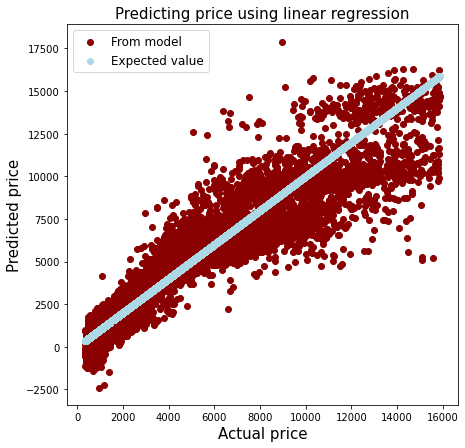

In [15]:
y_pred = lin.predict(x_test)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, c='darkred', label='From model')
plt.scatter(y_test, y_test, c='lightblue', label='Expected value')
plt.legend(fontsize=12)
plt.xlabel('Actual price', fontsize=15)
plt.ylabel('Predicted price', fontsize=15)
plt.title('Predicting price using linear regression', fontsize=15)
plt.show()

### Seems as though the linear model is predicting *negative* prices?! Oh no...
Let's try fitting with an EnembleRegressor to see if that works better.

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rr = RandomForestRegressor()
rr.fit(x_train, y_train)
rr_perc = '{:.2%}'.format(rr.score(x_test, y_test))
print('Using the Random Forest Regressor, we can predict the price with %s accuracy.' %(rr_perc))

Using the Random Forest Regressor, we can predict the price with 98.17% accuracy.


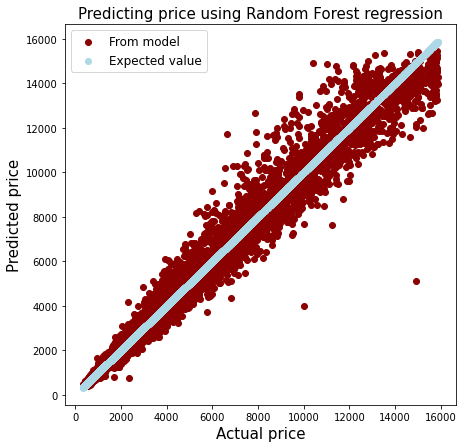

In [24]:
y_pred = rr.predict(x_test)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, c='darkred', label='From model')
plt.scatter(y_test, y_test, c='lightblue', label='Expected value')
plt.legend(fontsize=12)
plt.xlabel('Actual price', fontsize=15)
plt.ylabel('Predicted price', fontsize=15)
plt.title('Predicting price using Random Forest regression', fontsize=15)
plt.savefig('price_RR.png')
plt.show()

# 98.28 % accuracy! Not bad at all!

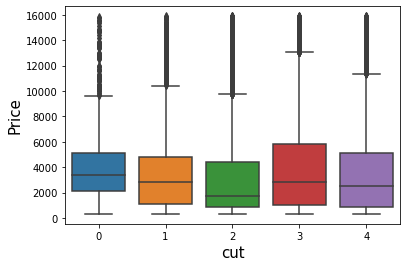

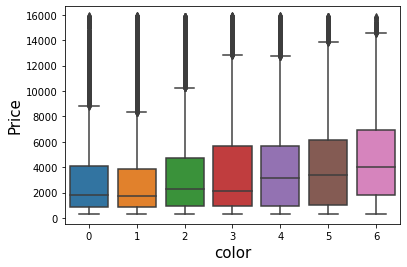

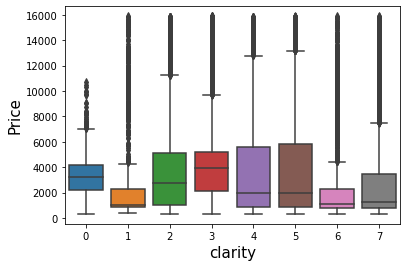

In [90]:
for i in range(len(cat_data.columns)):
    sb.boxplot(x=cat_data.columns[i], y='price', data=diamond_data)
    plt.ylabel('Price', fontsize=15)
    plt.xlabel(cat_data.columns[i], fontsize=15)
    plt.show()